# **Project 1 Report**

Nick Alvarez

CS458

## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

**(b) Repeat (a) for different dimensions from 2 to 50.**

In [6]:
import numpy as np
from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from progressbar import progressbar

MAX_ITERATIONS = 10
NUMBER_OF_POINTS = 50

def findMinMax(p):
  hull = ConvexHull(p)
  # Extract the points forming the convex hull
  hullpoints = p[hull.vertices,:]
  hdist = cdist(hullpoints, hullpoints, metric='euclidean')

  # Get the min/max points
  maxpair = np.unravel_index(hdist.argmax(), hdist.shape)
  i,j = np.where(hdist==np.min(hdist[np.nonzero(hdist)]))

  pairPoints = np.array([(np.linalg.norm(hullpoints[i][0] - hullpoints[i][1])),(np.linalg.norm(hullpoints[maxpair[0]] - hullpoints[maxpair[1]]))])
  logDiff = np.log10((pairPoints[1]-pairPoints[0])/pairPoints[0])
  print(logDiff)
  listOfLogDiffs.append(logDiff)

## Plotting the log results
def plotGraph():
  x = np.arange(2,MAX_ITERATIONS)
  y = listOfLogDiffs
  plt.title("Curse of Dimensionality") 
  plt.xlabel("Number of Dimensions") 
  plt.ylabel("Log_10 * ((Max-Min)/Min)") 
  plt.plot(x,y) 
  plt.show()

listOfLogDiffs = []

# Run the program
for x in progressbar(range(2,MAX_ITERATIONS), redirect_stdout=True):
  print(f"({x}/{MAX_ITERATIONS}): ", end='')
  findMinMax(np.random.rand(NUMBER_OF_POINTS,x))

plotGraph()

I could only generate a small number of dimensions, as running a large number of points with a high dimensionality took inhibitively long. However, the effect is shown.

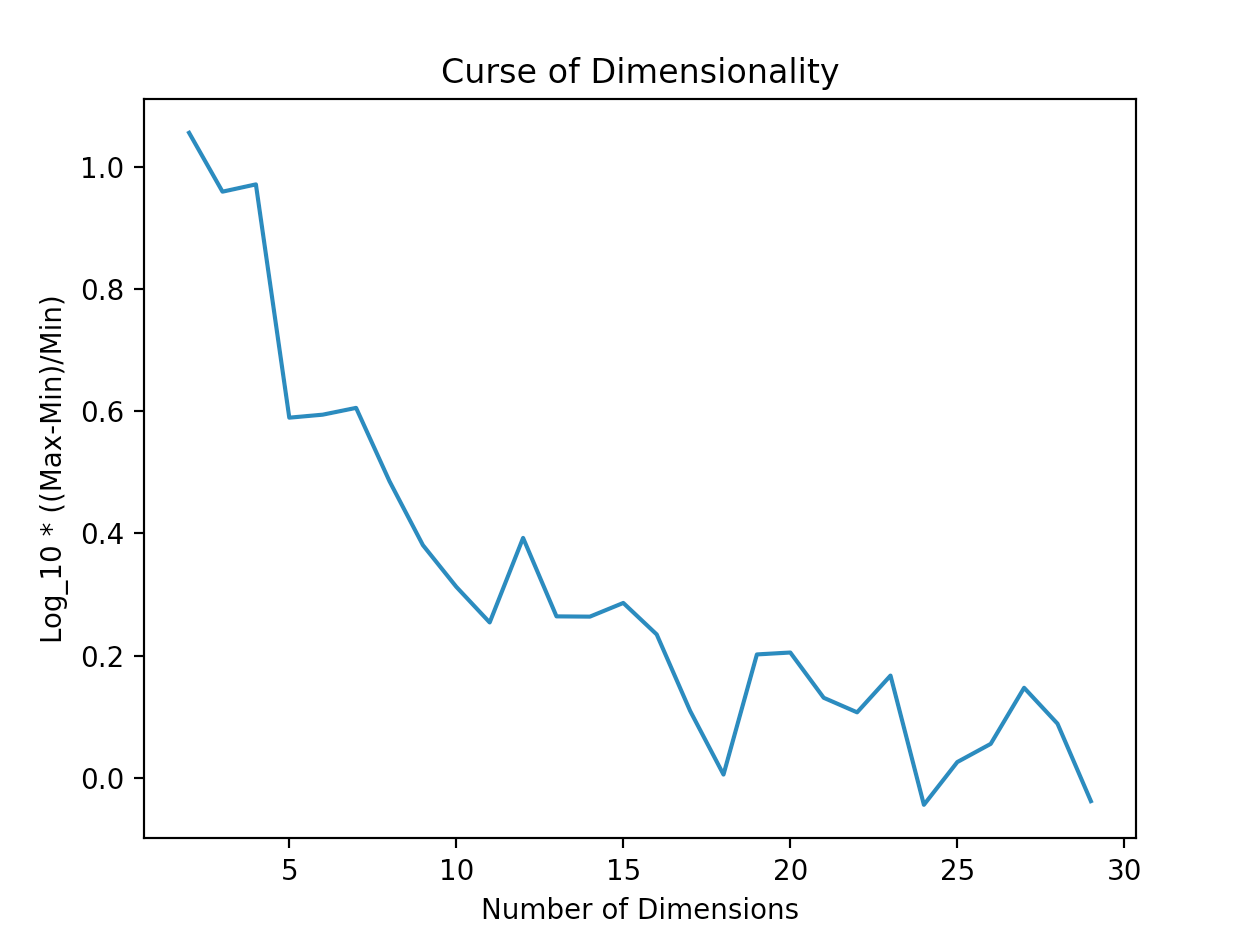

In [3]:
from IPython.display import Image
Image(filename = "curse.png", width=400, height=400)

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

NUMBER_PLOTS_SQ = 4

# import the data
iris = datasets.load_iris()
x = iris.data
y = iris.target

MarkerList = ['s', 'o', 'd']
TitleList = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

# Create Figure 1
fig, axs = plt.subplots(NUMBER_PLOTS_SQ, NUMBER_PLOTS_SQ)
fig.suptitle("Iris Data (blue=setosa, red=versicolor, green=virginica)")
# Create Figure 2
fig2, axs2 = plt.subplots()

# Iris 16 plots
def generatePlots():
  for v in range(NUMBER_PLOTS_SQ):
    for h in range(NUMBER_PLOTS_SQ):
      if (v != h):
        axs[v][h].scatter(x[:, h], x[:, v], s=7, c=y, cmap=plt.cm.brg, edgecolor='k', linewidth=0.5)
      else:
        axs[v][h].text(0.5, 0.5, TitleList[v], horizontalalignment='center', verticalalignment='center', clip_on=True)
        axs[v][h].xaxis.set_visible(False)
        axs[v][h].yaxis.set_visible(False)

def generateDiscretization():
  # Scatter two variables
  IrisLabels = ['Setosa', 'Versicolor', 'Virginica']
  for i in range(np.prod(y.shape)):
    axs2.scatter(x[i, 2], x[i, 3], marker=MarkerList[int(i/50)], c='k', s=10.0)
  #axs2.set_label(['Setosa', 'Versicolor', 'Virginica'])
  for l in range(len(IrisLabels)):
    axs2.scatter([],[],color='k', label=IrisLabels[l], marker=MarkerList[l])
  axs2.legend()
  
  # Delete unnecessary variables
  ClusterArray = np.delete(x, [0,1], 1)

  # Generate clusters
  axs2.set_xlabel("Petal Length (cm)")
  axs2.set_ylabel("Petal Width (cm)")
  km = KMeans(n_clusters=3)
  km.fit(ClusterArray)

  # Find centroids and plot them
  km_cntr = km.cluster_centers_
  axs2.scatter(km_cntr[:, 0], km_cntr[:, 1], c='red', s=15.0)
  
  # Create rectangles around clusters
  CentroidRectangleLengths = np.empty((0,2))
  for i in range(0,101,50):
    try:
      val_min_x, val_max_x = np.min(np.delete(ClusterArray[i:(i+50)], 1, 1), axis=0), np.max(np.delete(ClusterArray[i:(i+50)], 1, 1), axis=0)
      val_min_y, val_max_y = np.min(np.delete(ClusterArray[i:(i+50)], 0, 1), axis=0), np.max(np.delete(ClusterArray[i:(i+50)], 0, 1), axis=0)
      x_len, y_len = val_max_x-val_min_x, val_max_y-val_min_y
      CentroidRectangleLengths = np.append(CentroidRectangleLengths, [np.concatenate((x_len, y_len))], axis=0)
    except ValueError:
      pass
  
  # Plot the rectangles
  index=0
  sortedCenters = np.sort(km_cntr, axis=0)
  for c in (sortedCenters):
    width, height = CentroidRectangleLengths[index][0], CentroidRectangleLengths[index][1]
    axs2.add_patch(Rectangle(
      xy=(c[0]-width/2, c[1]-height/2), width=width, height=height, linewidth=1, color='black', fill=False))
    index += 1

generatePlots() #(a)
generateDiscretization() #(b)
plt.show()

The clusters were plotted naively as each type of flower has 50 points. So, each marker was spaced out by 50. In a real world scenario, I would need to set the markers based on the cluster results, not evenly spaced arrays.

Flower types that were correctly spaced, if going by markers, are 50/50 for each group. However, the rectangles (which were also naively plotted by finding the bounding box of the cluster and placing it on top of the centroid) are not as correct.

|Flower|Correct|Incorrect|
|------|-------|---------|
|Setosa|48|2|
|Versicolor|49|1|
|Virginica|48|2|

Not bad for a naive approach. Although, some of the boxes do overlap.

# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

In [9]:
# Codes for P1-3(a)

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

In [10]:
# Codes for P1-3(b)

Discuss your results here.